# Confusion Matrix

In [1]:

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
        https://stackoverflow.com/a/50386871
    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Data Pickling

In [2]:
#Import statements
import pickle
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve

In [3]:
with open('../../data/processed/full_set.pkl', 'rb') as f:
    full_set = pickle.load(f)
with open('../../data/processed/train_set.pkl', 'rb') as f:
    train_set = pickle.load(f)
with open('../../data/processed/test_set.pkl', 'rb') as f:
    test_set = pickle.load(f)
with open('../../data/processed/train_set_30.pkl', 'rb') as f:
    train_set_30 = pickle.load(f)
with open('../../data/processed/test_set_30.pkl', 'rb') as f:
    test_set_30 = pickle.load(f)
with open('../../data/processed/train_set_70.pkl', 'rb') as f:
    train_set_70 = pickle.load(f)
with open('../../data/processed/test_set_70.pkl', 'rb') as f:
    test_set_70 = pickle.load(f)

In [4]:
test_set_70.head()
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,target
5757,59.000000,51.000000,52.000000,73.000000,70.000000,45.000000,82.000000,102.000000,60.000000,65.000000,...,45.000000,41.0,38.000000,40.00000,41.000000,42.0,43.000000,37.000000,28.00000,5
7510,39.546453,36.907094,38.546453,40.959039,43.505492,48.505492,56.598398,63.237757,59.598398,56.732265,...,22.773227,22.0,22.546453,23.31968,23.546453,23.0,22.226773,22.226773,21.68032,7
55,16.000000,16.000000,17.000000,16.000000,16.000000,17.000000,17.000000,16.000000,16.000000,16.000000,...,14.000000,14.0,14.000000,14.00000,15.000000,15.0,14.000000,16.000000,17.00000,0
1983,40.000000,40.000000,40.000000,37.000000,36.000000,37.000000,38.000000,38.000000,40.000000,41.000000,...,94.000000,90.0,91.000000,84.00000,68.000000,51.0,42.000000,35.000000,34.00000,1
1842,34.000000,32.000000,32.000000,31.000000,28.000000,27.000000,27.000000,28.000000,30.000000,33.000000,...,35.000000,34.0,34.000000,34.00000,33.000000,34.0,33.000000,34.000000,34.00000,1


In [5]:
# Split into X, y format 
X_train = train_set.T.iloc[:-1].T
y_train = train_set.T.iloc[-1].T

X_test = test_set.T.iloc[:-1].T
y_test = test_set.T.iloc[-1].T

In [6]:
y_train.head()

5757    5.0
7510    7.0
55      0.0
1983    1.0
1842    1.0
Name: target, dtype: float64

# Multilayer Perceptron

### Experiment with various Neural Network parameters: add or remove nodes, layers and connections, vary the learning rate, epochs and momentum, and validation threshold.

In [7]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
def get_mlp():
    mlp = MLPClassifier(random_state=42
                        # more non default parameters? E.g. only stochastic gradient descent has been covered in lectures 
                        # also doesn't reach convergence before timeout with current settings
                       )
    return mlp

### Trying it using keras:

In [8]:
from numpy.random import seed
import random
import tensorflow as tf
np.random.seed(42)
random.seed(42)
from tensorflow import keras
# tf.random.set_random_seed(42)
tf.random.set_seed(42)

from keras.wrappers.scikit_learn import KerasClassifier

# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# https://machinelearningmastery.com/build-multi-layer-perceptron-neural-network-models-keras/
from keras.models import Sequential
from keras.layers import Dense

def build_keras_model():
    model = Sequential()
    model.add(Dense(1024, input_dim=2304, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    print(model.summary())

    # compile the keras model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fit the keras model on the dataset
# model.fit(X_train, y_train, epochs=10, batch_size=100)

# evaluate the keras model
# loss, accuracy = model.evaluate(X_test, y_test)

kcls = KerasClassifier(build_fn=build_keras_model, epochs=10, batch_size=100)

#Note, if you try running this example in an IPython or Jupyter notebook you may get an error.
#The reason is the output progress bars during training. 
#You can easily turn these off by setting verbose=0 in fit() and evaluate() calls



Using TensorFlow backend.


In [9]:
# https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/
from sklearn.model_selection import StratifiedKFold
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=False, random_state=42)
# todo run this
def cross_validate(classifier, X, y):
    '''    
    Given a classifier and training data:
        * Do 10fold CV
        * average the scores
    What this means is for the caller to interpret.
    Returns average result over CV runs 
    '''
    standardising_classifier = make_pipeline(preprocessing.StandardScaler(), classifier)
    scores = cross_val_score(standardising_classifier, X, y, cv=10)
    return np.mean(scores)

# Running An Experiment

In [88]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix
import pandas as pd

from sklearn.metrics import roc_auc_score

def run_experiment(classifier, X_train_data, y_train_data, X_test_data, y_test_data):
    '''
    Given a classifier, training data, and test data:
    * Train on the training data
    * Test on the test data
    * display the confusion matrix and other metrics
    '''
    classifier_pipe = make_pipeline(preprocessing.StandardScaler(), classifier)

    classifier_pipe.fit(X_train_data, y_train_data)
    y_pred = classifier_pipe.predict(X_test_data)

    conf_mat = confusion_matrix(y_test_data, y_pred)
    print(classification_report(y_test_data, y_pred))
    plot_confusion_matrix(conf_mat, target_names=y_test_data.unique().sort())
    
    #Conf matrix quantities to give an idea of TP/FP/TN/FN
    y_test_data_df = pd.DataFrame(y_test_data)
    y_pred_data_df = pd.DataFrame(y_pred)
    cnf_matrix = confusion_matrix(y_test_data_df.values, y_pred_data_df.values)
    
    # https://stackoverflow.com/questions/50666091/true-positive-rate-and-false-positive-rate-tpr-fpr-for-multi-class-data-in-py
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)

    print(f"True Positive Rate: {TPR}\nFalse Positive Rate: {FPR}\n")
    
    #AUC
#     print(roc_auc_score(y_test_data, y_pred))

    

## Linear Classifier

In [ ]:
from sklearn.svm import SVC
linclf = SVC(kernel="linear")
print("Linear Classifier, original split:")
print(f"{train_set['target'].shape[0]} training examples")
run_experiment(linclf, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
print("------\n")

## Neural Nets

In [ ]:
mlp_max = get_mlp()
cv = cross_validate(mlp_max, full_set.iloc[:,:-1], full_set['target'])
print(cv)
# run_experiment(mlp_max, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])

# 5-7: Using different sized train/test sets instead of cross validation

Original split:
6700 training examples
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       335
           1       0.96      0.98      0.97       350
           2       0.99      0.99      0.99       339
           3       0.99      0.98      0.98       332
           4       0.96      0.97      0.96       324
           5       0.99      0.98      0.98       308
           6       0.98      0.99      0.99       338
           7       0.95      1.00      0.98       316
           8       0.98      0.97      0.97       322
           9       0.99      1.00      0.99       336

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



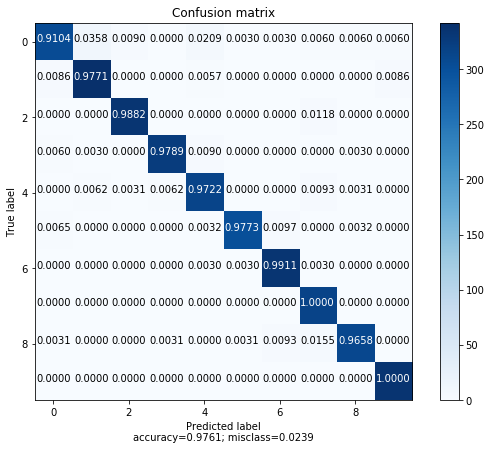

False Positive: [ 8. 15.  4.  3. 14.  3.  7. 15.  5.  5.]
False Negative: [30.  8.  4.  7.  9.  7.  3.  0. 11.  0.]
True Positive: [ 8. 15.  4.  3. 14.  3.  7. 15.  5.  5.]
True Negative: [2957. 2935. 2957. 2965. 2962. 2989. 2955. 2969. 2973. 2959.]

------

Reduced training set:
4720 training examples
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       520
           1       0.88      0.98      0.92       543
           2       0.99      1.00      0.99       530
           3       0.98      0.98      0.98       536
           4       0.98      0.98      0.98       544
           5       0.99      0.98      0.98       533
           6       1.00      0.99      0.99       519
           7       1.00      1.00      1.00       509
           8       0.98      1.00      0.99       515
           9       1.00      1.00      1.00       531

    accuracy                           0.98      5280
   macro avg       0.98      0.98      0.98   

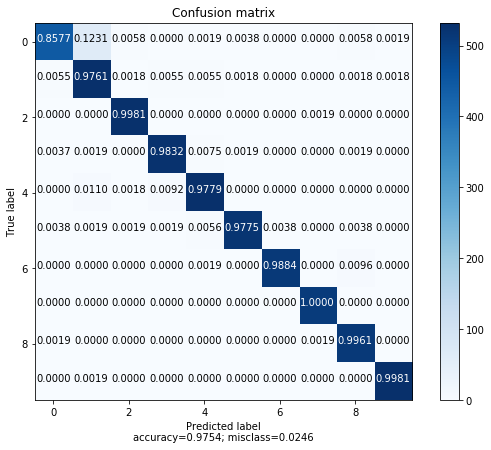

False Positive: [ 8. 73.  6.  9. 12.  4.  2.  2. 12.  2.]
False Negative: [74. 13.  1.  9. 12. 12.  6.  0.  2.  1.]
True Positive: [ 8. 73.  6.  9. 12.  4.  2.  2. 12.  2.]
True Negative: [4752. 4664. 4744. 4735. 4724. 4743. 4759. 4769. 4753. 4747.]

------

Smallest training set
2080 training examples
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       793
           1       0.87      0.95      0.91       795
           2       0.99      0.97      0.98       807
           3       0.97      0.96      0.96       808
           4       0.95      0.96      0.96       806
           5       0.99      0.96      0.97       787
           6       0.99      0.97      0.98       761
           7       0.95      1.00      0.97       796
           8       0.96      0.98      0.97       782
           9       0.98      1.00      0.99       785

    accuracy                           0.96      7920
   macro avg       0.96      0.96      0.96   

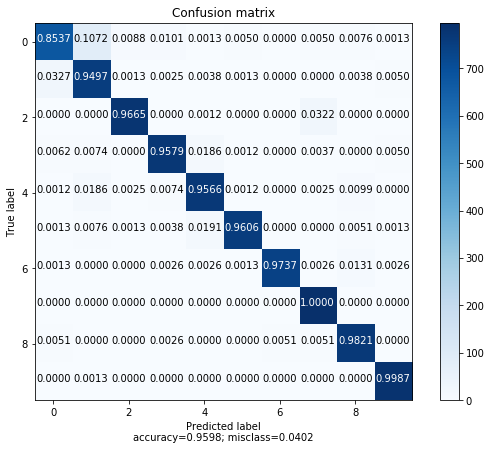

False Positive: [ 38. 113.  11.  23.  37.   8.   4.  41.  31.  12.]
False Negative: [116.  40.  27.  34.  35.  31.  20.   0.  14.   1.]
True Positive: [ 38. 113.  11.  23.  37.   8.   4.  41.  31.  12.]
True Negative: [7089. 7012. 7102. 7089. 7077. 7125. 7155. 7083. 7107. 7123.]

------



In [11]:
print("Original split:")
print(f"{train_set['target'].shape[0]} training examples")
mlp_max = get_mlp()
run_experiment(mlp_max, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
print("------\n")


print("Reduced training set:")
print(f"{train_set_30['target'].shape[0]} training examples")
mlp_mid = get_mlp()
run_experiment(mlp_mid, train_set_30.iloc[:,:-1], train_set_30['target'], test_set_30.iloc[:,:-1], test_set_30['target'])
print("------\n")


print("Smallest training set")
print(f"{train_set_70['target'].shape[0]} training examples")
mlp_small = get_mlp()
run_experiment(mlp_small, train_set_70.iloc[:,:-1], train_set_70['target'], test_set_70.iloc[:,:-1], test_set_70['target'])
print("------\n")


... So the results of the previous cell are a bit too good. Let's keep going with the training set reduction:

In [12]:
from sklearn.model_selection import train_test_split
import pandas as pd

# half the remaining training data
def half_remaining_training_data(train_X, train_y, test_X, test_y):
    X_train_tiny, X_test_tiny_tmp, y_train_tiny, y_test_tiny_tmp = train_test_split(train_X, train_y, test_size=0.5, random_state=42)
    
    # Move the new test split into the existing test data
    X_test_tiny = pd.concat([X_test_tiny_tmp, test_X], axis=0)
    y_test_tiny = pd.concat([y_test_tiny_tmp, test_y], axis=0)
                             
    return X_train_tiny, X_test_tiny, y_train_tiny, y_test_tiny



In [13]:
X_train_90, X_test_90, y_train_90, y_test_90 = half_remaining_training_data(train_set_70.iloc[:,:-1], train_set_70['target'], test_set_70.iloc[:,:-1], test_set_70['target'])
X_train_95, X_test_95, y_train_95, y_test_95 = half_remaining_training_data(X_train_90, y_train_90, X_test_90, y_test_90)

In [ ]:
print("10% training set")
print(f"{y_train_90.shape[0]} training examples")
mlp_tiny = get_mlp()
run_experiment(mlp_tiny, X_train_90, y_train_90, X_test_90, y_test_90)

print("5% training set")
print(f"{y_train_95.shape[0]} training examples")
mlp_tinier = get_mlp()
run_experiment(mlp_tinier, X_train_95, y_train_95, X_test_95, y_test_95)


Keras model, original data split:
6700 training examples
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1024)              2360320   
_________________________________________________________________
dense_24 (Dense)             (None, 500)               512500    
_________________________________________________________________
dense_25 (Dense)             (None, 256)               128256    
_________________________________________________________________
dense_26 (Dense)             (None, 100)               25700     
_________________________________________________________________
dense_27 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                650       
Total params: 3,033,890
Trainable params: 3,033,890
Non-trainab

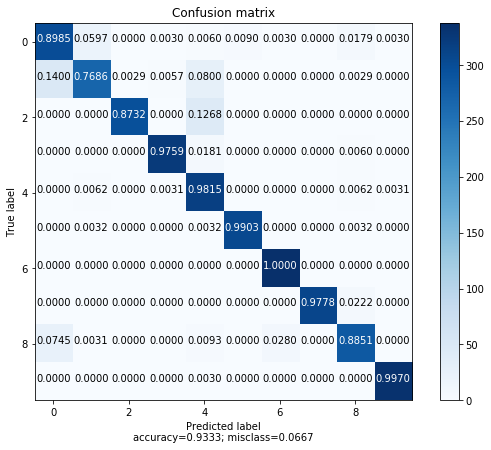

True Positive Rate: [0.89850746 0.76857143 0.87315634 0.97590361 0.98148148 0.99025974
 1.         0.9778481  0.88509317 0.99702381]
False Positive Rate: [0.02462057 0.00813559 0.00033772 0.00134771 0.02822581 0.00100267
 0.0033761  0.         0.00638012 0.00067476]

------



In [40]:
print("Keras model, original data split:")
print(f"{train_set['target'].shape[0]} training examples")

run_experiment(kcls, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
print("------\n")

## Experiments with CNNs

(6700, 2305)
(520, 2304)
(6700, 2304)
y_train_95.shape:  (520,)


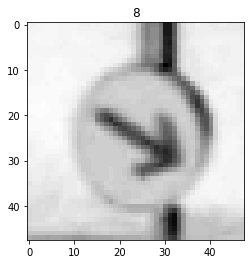

In [16]:
# Experiments in data reshaping to check techniques to be used in the CNN architecture
print(train_set.shape)
print(X_train_95.shape)
X_tmp = train_set.iloc[:,:-1]
print(X_tmp.shape)

reshaped_train = X_train_95.to_numpy().reshape(-1, 48, 48)
print("y_train_95.shape: ", y_train_95.shape)

plt.figure()
plt.imshow(reshaped_train[0], cmap='Greys')
plt.title(y_train_95.iloc[0])
plt.show()


In [17]:
def build_keras_cnn():
    '''
    A build function for a cnn that can be used by the keras skl classifier wrapper and therefore in our experimental setup.
    '''
    kernel_size = 3
    
    inputs = keras.Input(shape=(2304,), name='image')
    # reshape to [all examples=> -1, 48*48 image, greyscale=> 1 channel]
    reshape = keras.layers.Reshape(target_shape=(48, 48, 1))(inputs)

    
    layer_1 = keras.layers.Conv2D(filters=32, kernel_size=kernel_size, activation='relu')(reshape)
    pool_1 = keras.layers.MaxPooling2D()(layer_1)

    dense_block = keras.layers.Flatten()(pool_1)
    dense_block = keras.layers.Dense(256, activation='relu')(dense_block)
    dense_block = keras.layers.Dense(256, activation='relu')(dense_block)
    fin = keras.layers.Dense(64, activation='relu')(dense_block)

    # softmax_layer = keras.layers.Dense(10, activation='softmax')(model) # ignore softmax here, use SparseCategoricalCrossentropy below

    # compile the keras model
    model = keras.Model(inputs=inputs, outputs=fin, name='cnn')

    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
    return model

In [18]:
# Use tensorboard for visualisations
# to view, at the command prompt in this modeling directory with a local tensorflow install:
#   tensorboard --logdir tensorboard_logs/fit --host 0.0.0.0
# alternatively, see the % tensorboard cell below

tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir='tensorboard_logs', histogram_freq=1, write_graph=True, write_images=True
)

cnn_clf = KerasClassifier(build_fn=build_keras_cnn, epochs=10, batch_size=100, callbacks=[tensorboard_callback])

CNN model, original data split:
6700 training examples
Train on 6700 samples
Epoch 1/10
6700/6700 [==============================] - 16s 2ms/sample - loss: 1.6265 - accuracy: 0.6109
Epoch 2/10
6700/6700 [==============================] - 12s 2ms/sample - loss: 0.6425 - accuracy: 0.8352
Epoch 3/10
6700/6700 [==============================] - 11s 2ms/sample - loss: 0.5318 - accuracy: 0.8640
Epoch 4/10
6700/6700 [==============================] - 11s 2ms/sample - loss: 0.4839 - accuracy: 0.8819
Epoch 5/10
6700/6700 [==============================] - 13s 2ms/sample - loss: 0.4694 - accuracy: 0.8852
Epoch 6/10
6700/6700 [==============================] - 10s 2ms/sample - loss: 0.4580 - accuracy: 0.8876
Epoch 7/10
6700/6700 [==============================] - 10s 1ms/sample - loss: 0.4271 - accuracy: 0.8970
Epoch 8/10
6700/6700 [==============================] - 10s 1ms/sample - loss: 0.0309 - accuracy: 0.9910
Epoch 9/10
6700/6700 [==============================] - 12s 2ms/sample - loss: 0.01

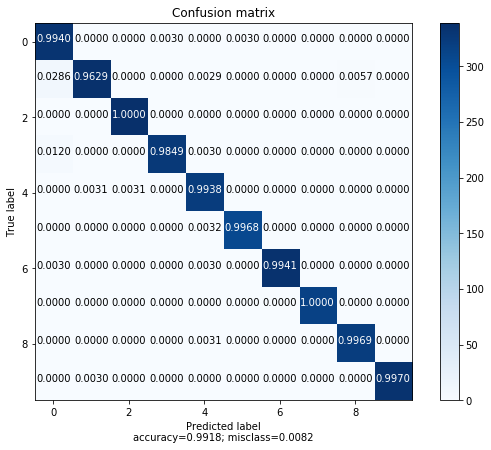

False Positive: [15.  2.  1.  1.  5.  1.  0.  0.  2.  0.]
False Negative: [ 2. 13.  0.  5.  2.  1.  2.  0.  1.  1.]
True Positive: [15.  2.  1.  1.  5.  1.  0.  0.  2.  0.]
True Negative: [2950. 2948. 2960. 2967. 2971. 2991. 2962. 2984. 2976. 2964.]

------



In [19]:
print("CNN model, original data split:")
print(f"{train_set['target'].shape[0]} training examples")
run_experiment(cnn_clf, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
print("------\n")

The junk architecture that I threw together as a test is slow but matches performance with the fully connected multi layer perceptron above.
Given that reduced training time is supposed to be an advantage of CNNs, this leaves some room for improvement.

# Visualize

In [21]:
%load_ext tensorboard

In [22]:
%tensorboard --logdir tensorboard_logs --host 0.0.0.0


In [23]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances


Known TensorBoard instances:
  - port 6006: logdir tensorboard_logs (started 0:00:19 ago; pid 210)


In [26]:
# https://keras.io/visualization/
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import model_to_dot
def visualize(mlp2): 
    # mlp2 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
    #                     solver='sgd', verbose=10, tol=1e-4, random_state=1,
    #                     learning_rate_init=.1)

#     mlp2 = get_mlp()
#     run_experiment(mlp2, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])

    mlp2.fit(train_set.iloc[:,:-1], train_set['target'])
    print("Training set score: %f" % mlp2.score(train_set.iloc[:,:-1], train_set['target']))
    print("Test set score: %f" % mlp2.score(test_set.iloc[:,:-1], test_set['target']))

    fig, axes = plt.subplots(4, 4)
    # use global min / max to ensure all weights are shown on the same scale
    vmin, vmax = mlp2.coefs_[0].min(), mlp2.coefs_[0].max()
    for coef, ax in zip(mlp2.coefs_[0].T, axes.ravel()):
        ax.matshow(coef.reshape(48, 48), cmap=plt.cm.gray, vmin=.5 * vmin,
                   vmax=.5 * vmax)
        ax.set_xticks(())
        ax.set_yticks(())

    plt.show()

# From here on out, will only use full data set since that gave the highest accuracy previously

## Point of comparison (same code from earlier): 

Original split:
6700 training examples
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       335
           1       0.96      0.98      0.97       350
           2       0.99      0.99      0.99       339
           3       0.99      0.98      0.98       332
           4       0.96      0.97      0.96       324
           5       0.99      0.98      0.98       308
           6       0.98      0.99      0.99       338
           7       0.95      1.00      0.98       316
           8       0.98      0.97      0.97       322
           9       0.99      1.00      0.99       336

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



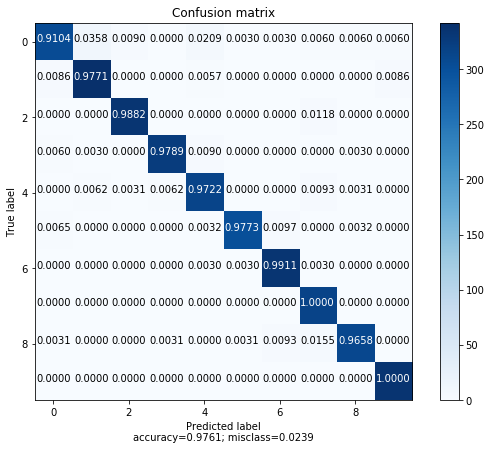

False Positive: [ 8. 15.  4.  3. 14.  3.  7. 15.  5.  5.]
False Negative: [30.  8.  4.  7.  9.  7.  3.  0. 11.  0.]
True Positive: [ 8. 15.  4.  3. 14.  3.  7. 15.  5.  5.]
True Negative: [2957. 2935. 2957. 2965. 2962. 2989. 2955. 2969. 2973. 2959.]

------

Training set score: 0.846418
Test set score: 0.824848


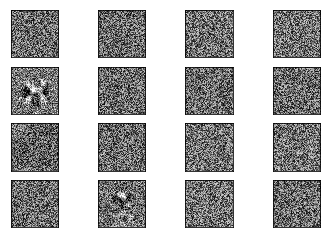

In [27]:
print("Original split:")
print(f"{train_set['target'].shape[0]} training examples")
mlp_max = get_mlp()
run_experiment(mlp_max, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
print("------\n")
# visualize(mlp_max)

# Adjusting learning rate:

## Adjusting the type of learning yielded no difference in accuracy value (always 98%)

Learning Rate Constant: 
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       335
           1       0.96      0.98      0.97       350
           2       0.99      0.99      0.99       339
           3       0.99      0.98      0.98       332
           4       0.96      0.97      0.96       324
           5       0.99      0.98      0.98       308
           6       0.98      0.99      0.99       338
           7       0.95      1.00      0.98       316
           8       0.98      0.97      0.97       322
           9       0.99      1.00      0.99       336

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



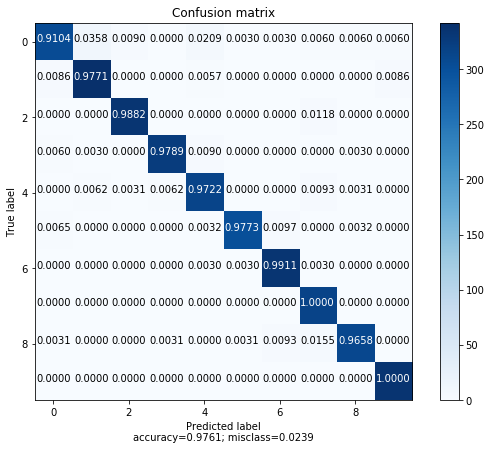

True Positive Rate: [0.91044776 0.97714286 0.98820059 0.97891566 0.97222222 0.97727273
 0.99112426 1.         0.96583851 1.        ]
False Positive Rate: [0.00269815 0.00508475 0.00135089 0.00101078 0.0047043  0.00100267
 0.00236327 0.00502681 0.00167898 0.00168691]

------

Learning Rate Inverse Scaling: 
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       335
           1       0.96      0.98      0.97       350
           2       0.99      0.99      0.99       339
           3       0.99      0.98      0.98       332
           4       0.96      0.97      0.96       324
           5       0.99      0.98      0.98       308
           6       0.98      0.99      0.99       338
           7       0.95      1.00      0.98       316
           8       0.98      0.97      0.97       322
           9       0.99      1.00      0.99       336

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.9

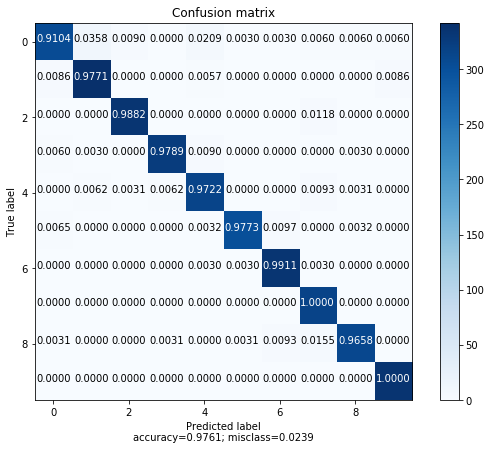

True Positive Rate: [0.91044776 0.97714286 0.98820059 0.97891566 0.97222222 0.97727273
 0.99112426 1.         0.96583851 1.        ]
False Positive Rate: [0.00269815 0.00508475 0.00135089 0.00101078 0.0047043  0.00100267
 0.00236327 0.00502681 0.00167898 0.00168691]

------

Learning Rate Adaptive: 
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       335
           1       0.96      0.98      0.97       350
           2       0.99      0.99      0.99       339
           3       0.99      0.98      0.98       332
           4       0.96      0.97      0.96       324
           5       0.99      0.98      0.98       308
           6       0.98      0.99      0.99       338
           7       0.95      1.00      0.98       316
           8       0.98      0.97      0.97       322
           9       0.99      1.00      0.99       336

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      

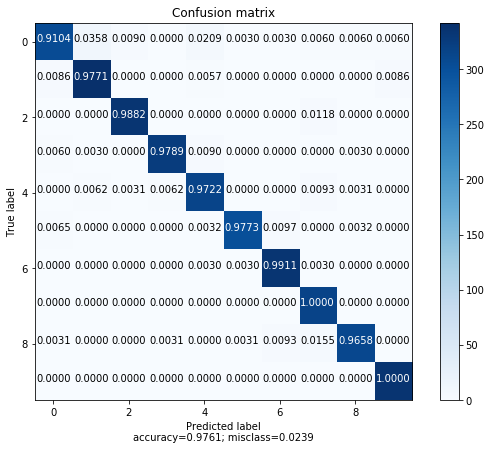

True Positive Rate: [0.91044776 0.97714286 0.98820059 0.97891566 0.97222222 0.97727273
 0.99112426 1.         0.96583851 1.        ]
False Positive Rate: [0.00269815 0.00508475 0.00135089 0.00101078 0.0047043  0.00100267
 0.00236327 0.00502681 0.00167898 0.00168691]

------



In [41]:
# Learning rate can be constant, invscaling, adaptive. First and last are straight forward, but:
#Invscaling- constant except for when loss has NOT gone down for 2 epochs

######### Default init of 0.001 with different methods ########
# print("Learning Rate Constant: ")
# mlp = MLPClassifier(random_state=42, learning_rate='constant')
# run_experiment(mlp, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
# print("------\n")

# print("Learning Rate Inverse Scaling: ")
# mlp = MLPClassifier(random_state=42, learning_rate='invscaling')
# run_experiment(mlp, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
# print("------\n")

# print("Learning Rate Adaptive: ")
# mlp = MLPClassifier(random_state=42, learning_rate='adaptive')
# run_experiment(mlp, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
# print("------\n")

Learning Rate Init = 0.0001: 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       335
           1       0.97      0.97      0.97       350
           2       0.99      1.00      1.00       339
           3       0.99      0.99      0.99       332
           4       0.98      0.99      0.99       324
           5       0.99      0.99      0.99       308
           6       1.00      0.99      1.00       338
           7       1.00      1.00      1.00       316
           8       0.98      0.99      0.99       322
           9       1.00      1.00      1.00       336

    accuracy                           0.99      3300
   macro avg       0.99      0.99      0.99      3300
weighted avg       0.99      0.99      0.99      3300



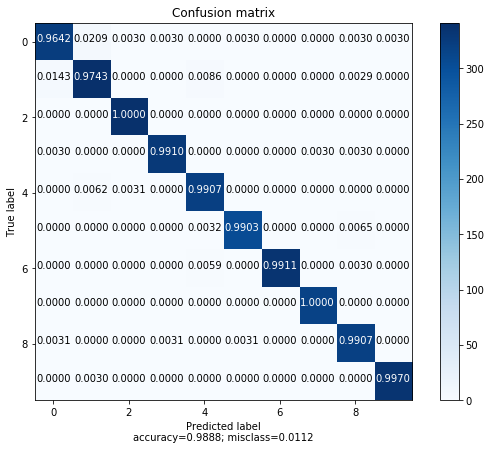

True Positive Rate: [0.9641791  0.97428571 1.         0.99096386 0.99074074 0.99025974
 0.99112426 1.         0.99068323 0.99702381]
False Positive Rate: [0.00236088 0.00338983 0.00067545 0.00067385 0.00201613 0.00066845
 0.         0.00033512 0.00201478 0.00033738]

------



In [47]:
######## Different learning rate init values ########

#Increase learning rate to 0.5 (learning_rate_init)
# print("Learning Rate Init = 0.5: ")
# mlp = MLPClassifier(random_state=42, learning_rate_init=0.5)
# run_experiment(mlp, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
# print("------\n")

#Decrease learning rate to 0.0001 (learning_rate_init)
print("Learning Rate Init = 0.0001: ")
mlp = MLPClassifier(random_state=42, learning_rate_init=0.0001)
run_experiment(mlp, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
print("------\n")

# Adjusting Epochs:

Epochs = 1000
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       335
           1       0.96      0.98      0.97       350
           2       0.99      0.99      0.99       339
           3       0.99      0.98      0.98       332
           4       0.96      0.97      0.96       324
           5       0.99      0.98      0.98       308
           6       0.98      0.99      0.99       338
           7       0.95      1.00      0.98       316
           8       0.98      0.97      0.97       322
           9       0.99      1.00      0.99       336

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



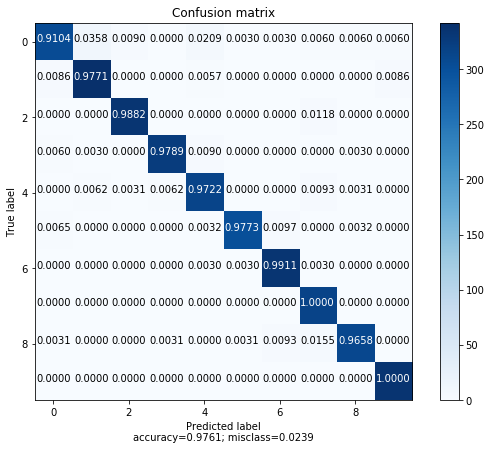

False Positive: [ 8. 15.  4.  3. 14.  3.  7. 15.  5.  5.]
False Negative: [30.  8.  4.  7.  9.  7.  3.  0. 11.  0.]
True Positive: [ 8. 15.  4.  3. 14.  3.  7. 15.  5.  5.]
True Negative: [2957. 2935. 2957. 2965. 2962. 2989. 2955. 2969. 2973. 2959.]

------

Training set score: 0.846418
Test set score: 0.824848


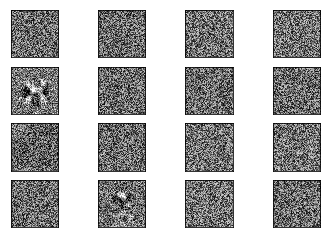

Epochs = 5: 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.75      0.93      0.83       335
           1       0.96      0.70      0.81       350
           2       0.99      1.00      0.99       339
           3       0.97      0.95      0.96       332
           4       0.97      0.91      0.94       324
           5       0.99      0.98      0.99       308
           6       1.00      0.98      0.99       338
           7       0.98      1.00      0.99       316
           8       0.91      1.00      0.95       322
           9       0.99      1.00      0.99       336

    accuracy                           0.94      3300
   macro avg       0.95      0.95      0.94      3300
weighted avg       0.95      0.94      0.94      3300



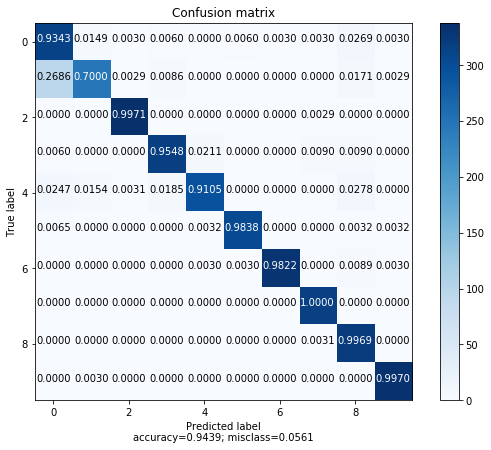

False Positive: [106.  11.   3.  11.   9.   3.   1.   6.  31.   4.]
False Negative: [ 22. 105.   1.  15.  29.   5.   6.   0.   1.   1.]
True Positive: [106.  11.   3.  11.   9.   3.   1.   6.  31.   4.]
True Negative: [2859. 2939. 2958. 2957. 2967. 2989. 2961. 2978. 2947. 2960.]

------



In [30]:
# Epochs = max_iters in scikit

#Increase num epochs
print("Epochs = 1000")
mlp = MLPClassifier(random_state=42, max_iter=1000)
run_experiment(mlp, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
print("------\n")
# visualize(mlp)

#Decrease num epochs
print("Epochs = 5: ")
mlp = MLPClassifier(random_state=42, max_iter=5)
run_experiment(mlp, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
print("------\n")

# Adjusting Momentum:

Momentum = 1.0: 
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       335
           1       0.96      0.98      0.97       350
           2       0.99      0.99      0.99       339
           3       0.99      0.98      0.98       332
           4       0.96      0.97      0.96       324
           5       0.99      0.98      0.98       308
           6       0.98      0.99      0.99       338
           7       0.95      1.00      0.98       316
           8       0.98      0.97      0.97       322
           9       0.99      1.00      0.99       336

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



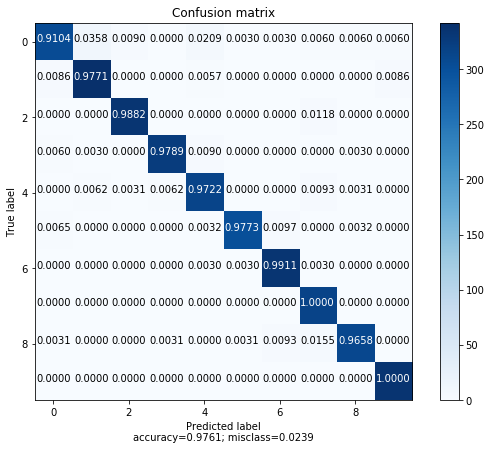

False Positive: [ 8. 15.  4.  3. 14.  3.  7. 15.  5.  5.]
False Negative: [30.  8.  4.  7.  9.  7.  3.  0. 11.  0.]
True Positive: [ 8. 15.  4.  3. 14.  3.  7. 15.  5.  5.]
True Negative: [2957. 2935. 2957. 2965. 2962. 2989. 2955. 2969. 2973. 2959.]

------

Momentum = 0.5: 
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       335
           1       0.96      0.98      0.97       350
           2       0.99      0.99      0.99       339
           3       0.99      0.98      0.98       332
           4       0.96      0.97      0.96       324
           5       0.99      0.98      0.98       308
           6       0.98      0.99      0.99       338
           7       0.95      1.00      0.98       316
           8       0.98      0.97      0.97       322
           9       0.99      1.00      0.99       336

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0

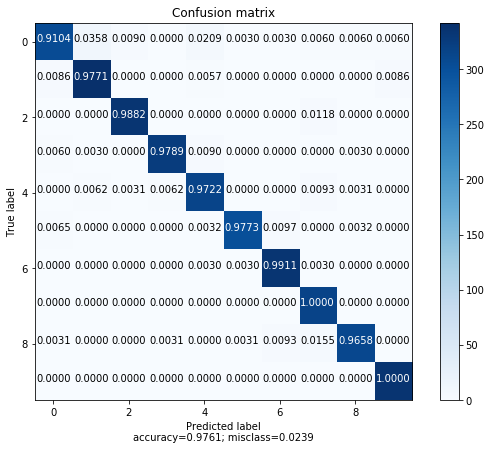

False Positive: [ 8. 15.  4.  3. 14.  3.  7. 15.  5.  5.]
False Negative: [30.  8.  4.  7.  9.  7.  3.  0. 11.  0.]
True Positive: [ 8. 15.  4.  3. 14.  3.  7. 15.  5.  5.]
True Negative: [2957. 2935. 2957. 2965. 2962. 2989. 2955. 2969. 2973. 2959.]

------

Momentum = 0.1: 
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       335
           1       0.96      0.98      0.97       350
           2       0.99      0.99      0.99       339
           3       0.99      0.98      0.98       332
           4       0.96      0.97      0.96       324
           5       0.99      0.98      0.98       308
           6       0.98      0.99      0.99       338
           7       0.95      1.00      0.98       316
           8       0.98      0.97      0.97       322
           9       0.99      1.00      0.99       336

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0

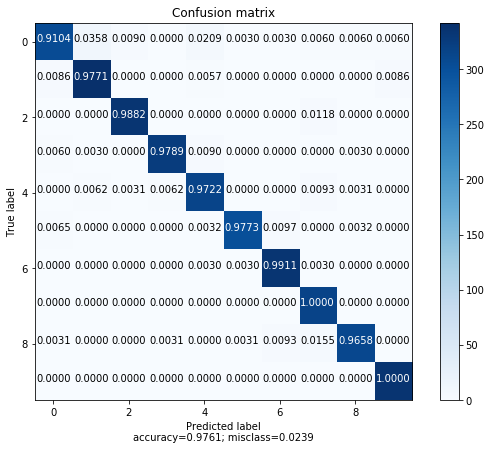

False Positive: [ 8. 15.  4.  3. 14.  3.  7. 15.  5.  5.]
False Negative: [30.  8.  4.  7.  9.  7.  3.  0. 11.  0.]
True Positive: [ 8. 15.  4.  3. 14.  3.  7. 15.  5.  5.]
True Negative: [2957. 2935. 2957. 2965. 2962. 2989. 2955. 2969. 2973. 2959.]

------



In [31]:
#Between 0 and 1, default = 0.9

print("Momentum = 1.0: ")
mlp = MLPClassifier(random_state=42, momentum=1.0)
run_experiment(mlp, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
print("------\n")

print("Momentum = 0.5: ")
mlp = MLPClassifier(random_state=42, momentum=0.5)
run_experiment(mlp, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
print("------\n")

print("Momentum = 0.1: ")
mlp = MLPClassifier(random_state=42, momentum=0.1)
run_experiment(mlp, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
print("------\n")

# Adjusting Validation Threshold:

Validation Threshold = 0.1: 
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       335
           1       0.94      0.96      0.95       350
           2       0.99      1.00      1.00       339
           3       0.99      0.98      0.98       332
           4       0.97      0.98      0.98       324
           5       1.00      0.99      0.99       308
           6       1.00      0.99      1.00       338
           7       1.00      1.00      1.00       316
           8       0.97      1.00      0.98       322
           9       1.00      1.00      1.00       336

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



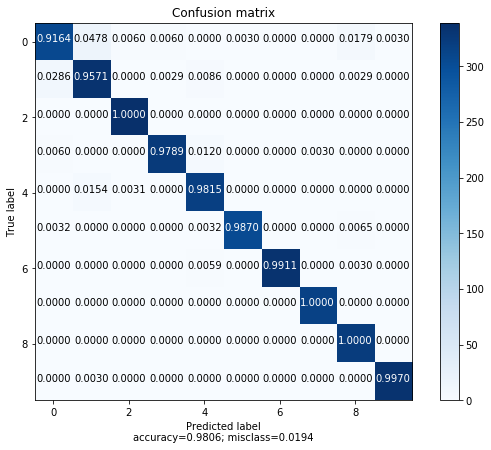

False Positive: [13. 22.  3.  3. 10.  1.  0.  1. 10.  1.]
False Negative: [28. 15.  0.  7.  6.  4.  3.  0.  0.  1.]
True Positive: [13. 22.  3.  3. 10.  1.  0.  1. 10.  1.]
True Negative: [2952. 2928. 2958. 2965. 2966. 2991. 2962. 2983. 2968. 2963.]

------

Validation Threshold = 0.5: 
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       335
           1       0.93      0.95      0.94       350
           2       0.98      1.00      0.99       339
           3       0.98      0.98      0.98       332
           4       0.98      0.97      0.98       324
           5       1.00      0.98      0.99       308
           6       1.00      0.98      0.99       338
           7       0.99      1.00      1.00       316
           8       0.96      0.99      0.97       322
           9       0.99      1.00      1.00       336

    accuracy                           0.97      3300
   macro avg       0.98      0.97      0.97      3300
weighted

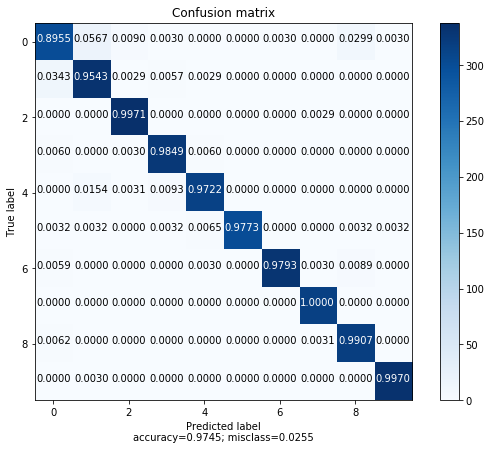

False Positive: [19. 26.  6.  7.  6.  0.  1.  3. 14.  2.]
False Negative: [35. 16.  1.  5.  9.  7.  7.  0.  3.  1.]
True Positive: [19. 26.  6.  7.  6.  0.  1.  3. 14.  2.]
True Negative: [2946. 2924. 2955. 2961. 2970. 2992. 2961. 2981. 2964. 2962.]

------

Validation Threshold = 0.9: 
              precision    recall  f1-score   support

           0       0.87      0.70      0.78       335
           1       0.77      0.87      0.82       350
           2       0.91      0.96      0.94       339
           3       0.96      0.92      0.94       332
           4       0.91      0.86      0.88       324
           5       0.96      0.95      0.96       308
           6       0.99      0.88      0.93       338
           7       0.89      1.00      0.94       316
           8       0.86      0.96      0.90       322
           9       0.98      0.98      0.98       336

    accuracy                           0.91      3300
   macro avg       0.91      0.91      0.91      3300
weighted

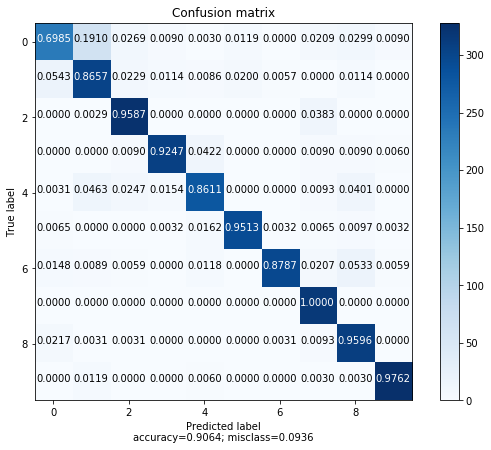

False Positive: [34. 88. 31. 13. 29. 11.  4. 39. 52.  8.]
False Negative: [101.  47.  14.  25.  45.  15.  41.   0.  13.   8.]
True Positive: [34. 88. 31. 13. 29. 11.  4. 39. 52.  8.]
True Negative: [2931. 2862. 2930. 2955. 2947. 2981. 2958. 2945. 2926. 2956.]

------



In [34]:
#Only used if early_stopping = True (which default is false)
#Must be between 0 and 1

print("Validation Threshold = 0.1: ")
mlp = MLPClassifier(random_state=42, early_st./opping=True, validation_fraction=0.1)
run_experiment(mlp, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
print("------\n")

print("Validation Threshold = 0.5: ")
mlp = MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.5)
run_experiment(mlp, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
print("------\n")

print("Validation Threshold = 0.9: ")
mlp = MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.9)
run_experiment(mlp, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
print("------\n")


# print("Validation Threshold = 0.6: ")
# mlp = MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.6)
# run_experiment(mlp, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
# print("------\n")


# print("Validation Threshold = 0.75: ")
# mlp = MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.75)
# run_experiment(mlp, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
# print("------\n")

# Adjusting layers/nodes/connections (via Keras):

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 1024)              2360320   
_________________________________________________________________
dense_43 (Dense)             (None, 10)                10250     
Total params: 2,370,570
Trainable params: 2,370,570
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
6700/6700 [==============================] - 7s 1ms/step - loss: 1.1868 - accuracy: 0.7258
Epoch 2/10
6700/6700 [==============================] - 7s 983us/step - loss: 0.2703 - accuracy: 0.9167
Epoch 3/10
6700/6700 [==============================] - 6s 828us/step - loss: 0.2295 - accuracy: 0.9294
Epoch 4/10
6700/6700 [==============================] - 5s 719us/step - loss: 0.1382 - accuracy: 0.9543
Epoch 5/10
6700/6700 [==============================] - 6s 959us/step - loss: 0.1397 -

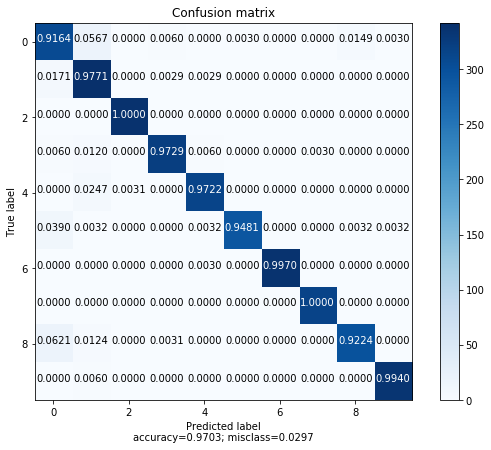

True Positive Rate: [0.91641791 0.97714286 1.         0.97289157 0.97222222 0.94805195
 0.99704142 1.         0.92236025 0.99404762]
False Positive Rate: [0.01349073 0.01288136 0.00033772 0.00134771 0.00168011 0.00033422
 0.         0.00033512 0.00201478 0.00067476]



In [68]:
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# https://machinelearningmastery.com/build-multi-layer-perceptron-neural-network-models-keras/
#96% with orriginal keras model
#Baseline was 97% accuracy
def two_layer_keras():
    model = Sequential()
    model.add(Dense(1024, input_dim=2304, activation='relu'))
#     model.add(Dense(256, activation='relu'))
#     model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    print(model.summary())

    # compile the keras model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fit the keras model on the dataset
# model.fit(X_train, y_train, epochs=10, batch_size=100)

# evaluate the keras model
# loss, accuracy = model.evaluate(X_test, y_test)

kcls_2layers = KerasClassifier(build_fn=two_layer_keras, epochs=10, batch_size=100)
run_experiment(kcls_2layers, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])

#Note, if you try running this example in an IPython or Jupyter notebook you may get an error.
#The reason is the output progress bars during training. 
#You can easily turn these off by setting verbose=0 in fit() and evaluate() calls



Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 1024)              2360320   
_________________________________________________________________
dense_39 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_40 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_41 (Dense)             (None, 10)                10250     
Total params: 4,469,770
Trainable params: 4,469,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
6700/6700 [==============================] - 12s 2ms/step - loss: 0.9514 - accuracy: 0.7167
Epoch 2/10
6700/6700 [==============================] - 11s 2ms/step - loss: 0.2919 - accuracy: 0.9027
Epoch 3/10
6700/6700 [========

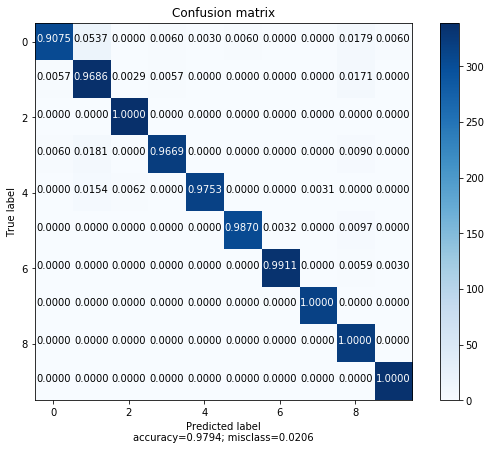

True Positive Rate: [0.90746269 0.96857143 1.         0.96686747 0.97530864 0.98701299
 0.99112426 1.         1.         1.        ]
False Positive Rate: [0.00134907 0.00983051 0.00101317 0.00134771 0.00033602 0.00066845
 0.00033761 0.00033512 0.00671592 0.00101215]



In [67]:
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# https://machinelearningmastery.com/build-multi-layer-perceptron-neural-network-models-keras/
#96% with orriginal keras model
#Baseline was 97% accuracy
def same_layer_keras():
    model = Sequential()
    model.add(Dense(1024, input_dim=2304, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    print(model.summary())

    # compile the keras model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fit the keras model on the dataset
# model.fit(X_train, y_train, epochs=10, batch_size=100)

# evaluate the keras model
# loss, accuracy = model.evaluate(X_test, y_test)

kcls_same = KerasClassifier(build_fn=same_layer_keras, epochs=10, batch_size=100)
run_experiment(kcls_same, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])

#Note, if you try running this example in an IPython or Jupyter notebook you may get an error.
#The reason is the output progress bars during training. 
#You can easily turn these off by setting verbose=0 in fit() and evaluate() calls



Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 1024)              2360320   
_________________________________________________________________
dense_53 (Dense)             (None, 500)               512500    
_________________________________________________________________
dense_54 (Dense)             (None, 256)               128256    
_________________________________________________________________
dense_55 (Dense)             (None, 100)               25700     
_________________________________________________________________
dense_56 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_57 (Dense)             (None, 10)                650       
Total params: 3,033,890
Trainable params: 3,033,890
Non-trainable params: 0
___________________________________________

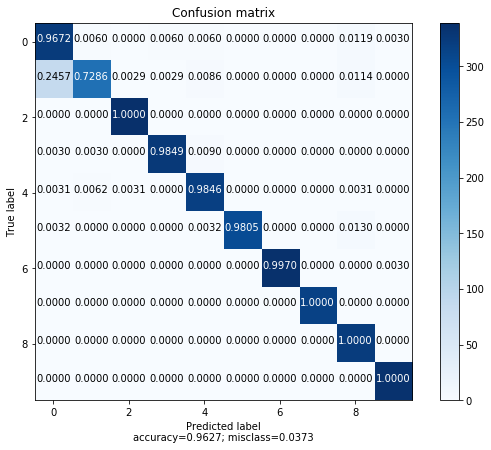

True Positive Rate: [0.96716418 0.72857143 1.         0.98493976 0.9845679  0.98051948
 0.99704142 1.         1.         1.        ]
False Positive Rate: [0.03001686 0.00169492 0.00067545 0.00101078 0.00302419 0.
 0.         0.         0.00436535 0.00067476]



In [73]:
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# https://machinelearningmastery.com/build-multi-layer-perceptron-neural-network-models-keras/
#96% with orriginal keras model
#Baseline was 97% accuracy
def six_layer_keras():
    model = Sequential()
    model.add(Dense(1024, input_dim=2304, activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    print(model.summary())

    # compile the keras model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fit the keras model on the dataset
# model.fit(X_train, y_train, epochs=10, batch_size=100)

# evaluate the keras model
# loss, accuracy = model.evaluate(X_test, y_test)

kcls_6layers = KerasClassifier(build_fn=six_layer_keras, epochs=10, batch_size=100)
run_experiment(kcls_6layers, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])

#Note, if you try running this example in an IPython or Jupyter notebook you may get an error.
#The reason is the output progress bars during training. 
#You can easily turn these off by setting verbose=0 in fit() and evaluate() calls



Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 1024)              2360320   
_________________________________________________________________
dense_51 (Dense)             (None, 10)                10250     
Total params: 2,370,570
Trainable params: 2,370,570
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
6700/6700 [==============================] - 7s 1ms/step - loss: 0.8475 - accuracy: 0.7734
Epoch 2/10
6700/6700 [==============================] - 7s 1ms/step - loss: 0.2128 - accuracy: 0.9343
Epoch 3/10
6700/6700 [==============================] - 6s 834us/step - loss: 0.1704 - accuracy: 0.9478
Epoch 4/10
6700/6700 [==============================] - 6s 915us/step - loss: 0.1316 - accuracy: 0.9585
Epoch 5/10
6700/6700 [==============================] - 6s 822us/step - loss: 0.0961 - a

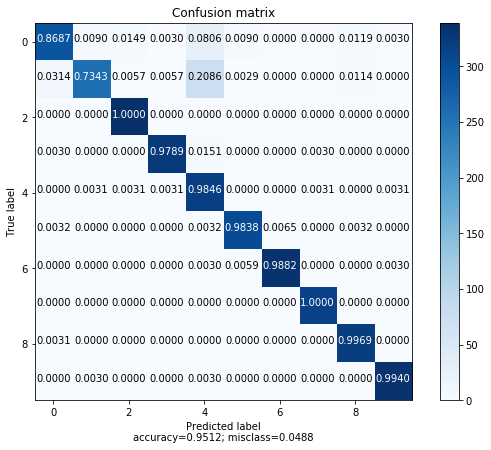

True Positive Rate: [0.86865672 0.73428571 1.         0.97891566 0.9845679  0.98376623
 0.98816568 1.         0.99689441 0.99404762]
False Positive Rate: [0.00472175 0.00169492 0.00270179 0.00134771 0.03629032 0.00200535
 0.00067522 0.00067024 0.00302216 0.00101215]



In [72]:
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# https://machinelearningmastery.com/build-multi-layer-perceptron-neural-network-models-keras/
#96% with orriginal keras model
#Baseline was 97% accuracy
def tanh_softmax_keras():
    model = Sequential()
    model.add(Dense(1024, input_dim=2304, activation='tanh'))
#     model.add(Dense(1024, input_dim=2304, activation='softmax'))
    model.add(Dense(10, activation='softmax'))
    print(model.summary())

    # compile the keras model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

kcls_activ = KerasClassifier(build_fn=tanh_softmax_keras, epochs=10, batch_size=100)
run_experiment(kcls_activ, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])


# Maximizing all parameters:

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       335
           1       0.92      0.94      0.93       350
           2       0.99      1.00      1.00       339
           3       0.99      0.98      0.99       332
           4       0.97      0.98      0.97       324
           5       0.99      0.99      0.99       308
           6       1.00      0.99      1.00       338
           7       0.99      1.00      1.00       316
           8       0.96      1.00      0.98       322
           9       1.00      1.00      1.00       336

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



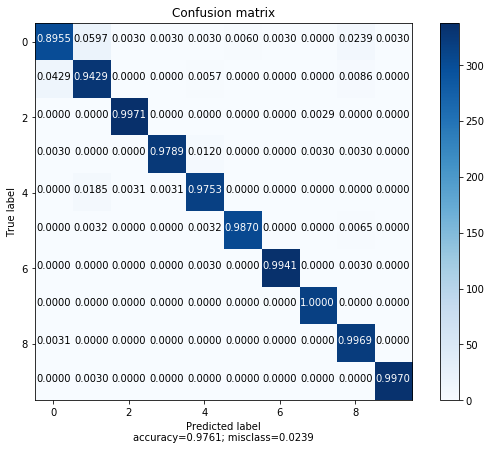

True Positive Rate: [0.89552239 0.94285714 0.99705015 0.97891566 0.97530864 0.98701299
 0.99408284 1.         0.99689441 0.99702381]
False Positive Rate: [0.00573356 0.00949153 0.00067545 0.00067385 0.00302419 0.00066845
 0.00033761 0.00067024 0.00503694 0.00033738]

------

Training set score: 0.977910
Test set score: 0.936970


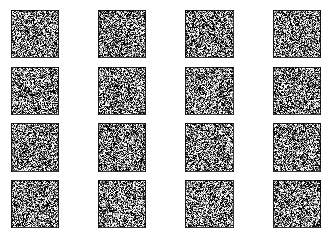

In [46]:
mlp = MLPClassifier(random_state=42, learning_rate_init=0.0001, max_iter=1000, early_stopping=True, validation_fraction=0.1)
run_experiment(mlp, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
print("------\n")
# visualize(mlp)

In [74]:
#Can only work with Keras
# history = kcls.fit(train_set.iloc[:,:-1], train_set['target'], validation_split=0.25, epochs=10, batch_size=100)

# # Plot training & validation accuracy values
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(historny.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# Best performing tests visualization

In [97]:
tensorboard_callback2 = keras.callbacks.TensorBoard(
    log_dir='tensorboard_logs_2layers', histogram_freq=1, write_graph=True, write_images=True
)

In [105]:
# cnn_clf = KerasClassifier(build_fn=build_keras_cnn, epochs=10, batch_size=100, callbacks=[tensorboard_callback])

# mlp_validation = MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.1, callbacks=[tensorboard_callback])
kcls_2layer = KerasClassifier(build_fn=two_layer_keras, epochs=10, batch_size=100, callbacks=[tensorboard_callback2])
kcls_1024 = KerasClassifier(build_fn=same_layer_keras, epochs=10, batch_size=100, callbacks=[tensorboard_callback2])
kcls_6layer = KerasClassifier(build_fn=six_layer_keras, epochs=10, batch_size=100, callbacks=[tensorboard_callback2])

run_experiment(kcls_2layer, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
run_experiment(kcls_1024, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])
run_experiment(kcls_6layer, train_set.iloc[:,:-1], train_set['target'], test_set.iloc[:,:-1], test_set['target'])


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 1024)              2360320   
_________________________________________________________________
dense_71 (Dense)             (None, 10)                10250     
Total params: 2,370,570
Trainable params: 2,370,570
Non-trainable params: 0
_________________________________________________________________
None


AttributeError: 'Sequential' object has no attribute 'run_eagerly'

In [103]:
%reload_ext tensorboard

In [104]:
%tensorboard --logdir tensorboard_logs_2layers --host 0.0.0.0